# Sales-Revenue-Prediction-Using-Simple-and-multiple-Linear-Regression


**The Problem statement:**

This data is about the amount spent on advertising through different channels like TV, Radio and Newspaper. The goal is to predict how the expense on each channel affects the sales and is there a way to optimise that sale?

In [1]:
# necessary imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv('Advertising.csv') # loading the data

In [3]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
data.drop(columns = 'Unnamed: 0', axis = 1, inplace = True) # dropping unnecessary column

In [8]:
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
# finding null values

data.isna().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

### Simple Linear Regression

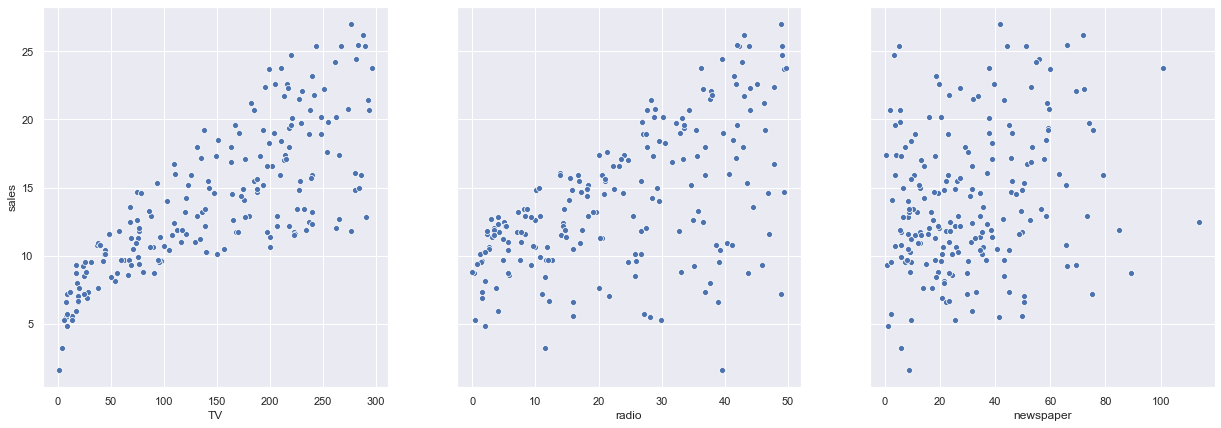

In [10]:
# visualizing the relationship between the features and the label

fig, ax = plt.subplots(1, 3, figsize = (21, 7), sharey = True)

sns.scatterplot(x = 'TV', y = 'sales', data = data, ax = ax[0])
sns.scatterplot(x = 'radio', y = 'sales', data = data, ax = ax[1])
sns.scatterplot(x = 'newspaper', y = 'sales', data = data, ax = ax[2])

plt.show()

- we can see that relationship of sales and 'TV' is linear but relationship of 'radio' and 'newspaper' with sales are not so good, so for simple linear regression we will select 'TV' column for our model.

**we can also do feature selection using statsmodels library.**

In [11]:
import statsmodels.formula.api as smf

lm = smf.ols(formula = 'sales ~ TV', data = data).fit()
print(lm.rsquared)
print(lm.summary())

0.611875050850071
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           1.47e-42
Time:                        12:11:32   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458  

In [12]:
lm = smf.ols(formula = 'sales ~ radio', data = data).fit()
print(lm.rsquared)
print(lm.summary())

0.33203245544529525
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     98.42
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           4.35e-19
Time:                        12:11:32   Log-Likelihood:                -573.34
No. Observations:                 200   AIC:                             1151.
Df Residuals:                     198   BIC:                             1157.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.3116      0.563

In [13]:
lm = smf.ols(formula = 'sales ~ newspaper', data = data).fit()
print(lm.rsquared)
print(lm.summary())

0.05212044544430516
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Mon, 29 Mar 2021   Prob (F-statistic):            0.00115
Time:                        12:11:33   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621

**We can see that `TV` column has highest R-squared and Adj. R-squared value.**

In [14]:
# creating x and y 

feature_columns = ['TV']

X = data[feature_columns]
y = data.sales

In [15]:
# splitting data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((150, 1), (150,), (50, 1), (50,))

In [16]:
# fitting data to linear regression model

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# intercept and coefficient 

print(lr.intercept_)
print(lr.coef_)

7.248909283005855
[0.04614341]


In [18]:
y_pred = lr.predict(X_test)

In [19]:
y_pred[:10]

array([10.44203308,  9.55607966, 11.42027332, 20.61665445, 15.10251725,
        9.84216879,  7.65035693, 18.32794143,  8.34712238, 16.36684661])

In [20]:
# accuracy of model

from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

print(f"Mean Squared Error of Model is : {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error of Model is : {mean_absolute_error(y_test, y_pred)}")
print(f"Root Mean Squared Error of Model is : {sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error of Model is : 8.730248872947453
Mean Absolute Error of Model is : 2.298513328039085
Root Mean Squared Error of Model is : 2.954699455604149


In [21]:
# function to create adjusted R-Squared

def adj_r2(x,y):
    
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    
    return adjusted_r2

In [22]:
print(lr.score(X_train, y_train)) # training accuracy of model

0.5767451599400782


In [23]:
print(adj_r2(X_train, y_train)) # adjusted r-squared

0.5738853299396733


In [24]:
print(lr.score(X_test, y_test)) # testing accuracy of model

0.6902574858002379


In [25]:
print(adj_r2(X_test, y_test)) # adjusted r-squared

0.6838045167544096


In [26]:
# comparing actual and predicted values

comp = pd.DataFrame({'Actual': y_test, 'Predicted' : y_pred})
comp.head

<bound method NDFrame.head of      Actual  Predicted
18     11.3  10.442033
170     8.4   9.556080
107     8.7  11.420273
98     25.4  20.616654
177    11.7  15.102517
182     8.7   9.842169
5       7.2   7.650357
146    13.2  18.327941
12      9.2   8.347122
152    16.6  16.366847
61     24.2  19.306182
125    10.6  11.272614
180    10.5  14.474967
154    15.6  15.914641
80     11.8  10.774266
7      13.2  12.795347
33     17.4  19.504598
130     1.6   7.281210
37     14.7  10.695822
74     17.0  17.095912
183    26.2  20.519753
145    10.3  13.722829
45     14.9  15.328620
159    12.9  13.325996
60      8.1   9.717582
123    15.2  12.929163
179    12.6  14.890258
185    22.6  16.708308
122    11.6  17.585033
44      8.5   8.407109
16     12.5  10.377432
55     23.7  16.426833
150    16.1  20.201364
111    21.8  18.401771
22      5.6   7.858002
189     6.7   8.111791
129     9.7   9.999056
4      12.9  15.591637
83     13.6  10.405118
106     7.2   8.402494
134    10.8   8.951601
66  

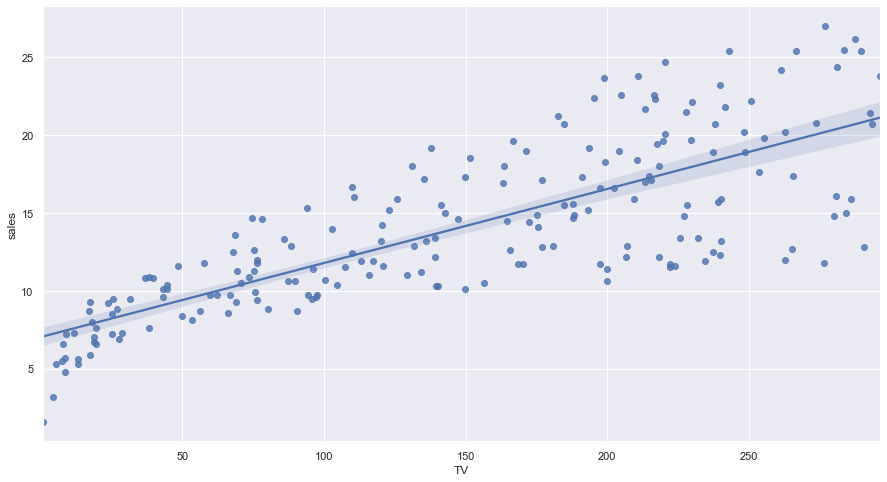

In [27]:
# Visualizing model

plt.figure(figsize = (15, 8))

sns.regplot(x = 'TV', y = 'sales', data = data)
plt.show()

### Multiple Linear Regression

### Feature Selection

In [28]:
# taking all columns

lm = smf.ols(formula = 'sales ~ TV + radio + newspaper', data = data).fit()
print(lm.rsquared)
print(lm.summary())

0.8972106381789522
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           1.58e-96
Time:                        12:11:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312 

In [29]:
# taking two columns at a time

# TV and radio features

lm = smf.ols(formula = 'sales ~ TV + radio', data = data).fit()
print(lm.rsquared)
print(lm.summary())

0.8971942610828956
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           4.83e-98
Time:                        12:11:33   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294 

### If we doesn't consider `newspaper` column and consider  `TV` and `radio` columns than also R-squared remains same.

In [30]:
# TV and newspaper 

lm = smf.ols(formula = 'sales ~ TV + newspaper', data = data).fit()
print(lm.rsquared)
print(lm.summary())

0.6458354938293271
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     179.6
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           3.95e-45
Time:                        12:11:33   Log-Likelihood:                -509.89
No. Observations:                 200   AIC:                             1026.
Df Residuals:                     197   BIC:                             1036.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7749      0.525 

### R-squared decreases for `TV` and `newspaper`.

In [31]:
# radio and newspaper

lm = smf.ols(formula = 'sales ~ radio + newspaper', data = data).fit()
print(lm.rsquared)
print(lm.summary())

0.33270518395032256
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     49.11
Date:                Mon, 29 Mar 2021   Prob (F-statistic):           4.96e-18
Time:                        12:11:33   Log-Likelihood:                -573.24
No. Observations:                 200   AIC:                             1152.
Df Residuals:                     197   BIC:                             1162.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.1889      0.628

### R-squared also decreases for `radio` and `newspaper` column.

### From above we can conclude that `TV` and `radio` column are best for our model.

In [32]:
# creating X and y

feature_columns = ['TV', 'radio']
X = data[feature_columns]
y = data.sales

### Checking for Multi Collinearity

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = X_scaled

vif = pd.DataFrame()

vif['VIF'] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif['features'] = X.columns

In [35]:
vif

,VIF,features
0,1.003013,TV
1,1.003013,radio


### We can see that vif is less than 5. So there is no multicollinearity.

In [36]:
# splitting data into training and testing set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 0)

In [37]:
X_train.shape, y_train.shape

((150, 2), (150,))

In [38]:
X_test.shape, y_test.shape

((50, 2), (50,))

In [39]:
# fitting data to model

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
# prediction

y_pred = lr.predict(X_test)

In [41]:
y_pred[:10]

array([10.05850143,  7.43463468,  6.9661994 , 24.15243914, 11.98916444,
        6.53178763, 13.04950021, 14.97882008, 10.96419972, 16.29194785])

In [42]:
# accuracy of model

print(f"Mean Squared Error of Model is : {mean_squared_error(y_test, y_pred)}")
print(f"Mean Absolute Error of Model is : {mean_absolute_error(y_test, y_pred)}")
print(f"Root Mean Squared Error of Model is : {sqrt(mean_squared_error(y_test, y_pred))}")

Mean Squared Error of Model is : 3.9998526675817487
Mean Absolute Error of Model is : 1.2947404377946767
Root Mean Squared Error of Model is : 1.9999631665562616


In [43]:
print(lr.score(X_train, y_train)) # training accuracy of model

0.9071991785449653


In [44]:
print(adj_r2(X_train, y_train)) # adj. r-squared score

0.9059365823346928


In [45]:
print(lr.score(X_test, y_test)) # testing accuracy of model

0.8580883042722334


In [46]:
print(adj_r2(X_test, y_test)) # adj. r-squared score

0.8520495087093497


### Accuracy of our model increases when we use `TV` and `radio` columns.

### As we can see that testing accuracy is less than training accuracy we will use `Regularization` in our model to check Overfitting.

- LASSO Regularization

In [47]:
from sklearn.linear_model import Lasso, LassoCV

In [48]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 1000, normalize = True)
lassocv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [49]:
alpha = lassocv.alpha_ # best alpha parameter
alpha

0.0007875048056098415

In [50]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.0007875048056098415, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [51]:
lasso_reg.score(X_test, y_test)

0.8580951554939487

**Lasso Reg score is same as r-squared score for our model. So, we can say that our OLS model did not overfit the data.**

- Ridge Regression

In [52]:
from sklearn.linear_model import Ridge, RidgeCV

In [53]:
alphas = np.random.uniform(low= 0, high = 10, size = (50,))
ridgecv = RidgeCV(alphas = alphas, cv = 10, normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([0.29807233, 8.14270637, 1.19106083, 9.23965847, 7.47643251,
       4.82764896, 8.62062686, 5.91953901, 9.02805896, 4.4540856 ,
       7.62404268, 1.12229525, 3.28345427, 3.61177405, 5.91829569,
       4.88167959, 3.77230284, 1.78976121, 4.18589151, 7.22159427,
       0.20360126, 9.2661672 , 3.45835447, 8.24729503, 4.22567308,
       5.99483252, 1.88380218, 8.45009062, 7.88112924, 4.85511082,
       6.32229787, 8.36172597, 0.93629301, 6.63003086, 2.64798792,
       5.88145928, 8.36577071, 4.3538671 , 1.51931754, 3.50857396,
       6.78109993, 6.32014811, 2.69272735, 3.02312151, 1.38029647,
       6.01715201, 5.36943701, 5.20485696, 1.444382  , 8.98678806]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [54]:
alpha = ridgecv.alpha_
alpha

0.203601264831208

In [55]:
ridge_model = Ridge(alpha = alpha)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.203601264831208, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [56]:
ridge_model.score(X_test, y_test)

0.858077132027598

**We got same r2 score using Ridge regression as well. So, it's safe to say there is no overfitting.**

- Elastic Net

In [57]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [58]:
elasticcv = ElasticNetCV(alphas = None, cv = 10)
elasticcv.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [59]:
alpha = elasticcv.alpha_
alpha

0.007673013455488211

In [60]:
elasticcv.l1_ratio

0.5

In [61]:
elasticnet_reg = ElasticNet(alpha = alpha, l1_ratio = 0.5)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.007673013455488211, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [62]:
elasticnet_reg.score(X_test, y_test)

0.8580738705375235

### So, we can see by using different types of regularization, we still are getting the same r2 score. That means our OLS model has been well trained over the training data and there is no overfitting.